In [74]:
#If You Want To See Flat Bands You Have To Choose To Lattice Size is 12x12 and alpha=1/3
L_x=L_y=5
p=1
q=L_y
alpha = p/q

In [75]:
import sys
sys.path.insert(0, 'Hofstadter')
from square_tight_binding import *
from Periodic_BC_Hofstadter_Hamiltonian_Matrix import *

In [76]:
#Calculate the Eigenvalues of Periodic Hamiltonian
eigenValues_R, eigenVectors_R = np.linalg.eig(PerHMat(L_x,L_y,alpha))
idx = np.argsort(eigenValues_R)
sorted_R = eigenValues_R[idx]*np.exp((-np.pi/2)*(1-alpha)) 

https://arxiv.org/pdf/1005.3282.pdf

\begin{align}
H &= \sum_{j \neq k} J(z_j,z_k) a_j^\dagger a_k \\
J(z_j,z_k) &= W(z)e^{  (\pi/2) (z_j z^* - z_j^* z) \phi  } \\
z_j &= x_j + i y_j, \quad z = z_k - z_j\\
G(z) &= -1^{ x+y+xy } \\
W(z) &= tG(z)e^{ -\pi/2[ (1-\phi)|z|^2] }
\end{align}

In [77]:
#Hopping Parameter
t = 1
_,_,xy= lattice_2d(L_x,L_y)
#Definition of Kapit-Mueller Model
def Kapit_Mueller_Hamiltonian(L_x, L_y, p, q, Tx, Ty):
    H = np.zeros((L_x*L_y, L_x*L_y), dtype=complex)
    for j in range(L_x*L_y):
        for k in range(L_y*L_x):
            if j!=k:
                
                x_j = xy[j, 0] #x coordinates of jth lattice site
                y_j = xy[j, 1] #y coordinates of jth lattice site
                x_k = xy[k, 0] #x coordinates of kth lattice site
                y_k = xy[k, 1] #y coordinates of kth lattice site
                
                #Definitions of Complex Notation
                z_j = x_j + 1j*y_j
                z_k = x_k + 1j*y_k
                
                for n in range(-1,2):
                    for m in range(-1,2):
                        
                        R = n*L_x+1j*m*L_y
                        z = (z_k - z_j)+R #It must be not equal to zero! (j!=k)
                        G = (-1)**(np.real(z)+np.imag(z)+np.real(z)*np.imag(z))
                        
                        #Definitions of Phase Arguments
                        beta = (np.pi/2)*((z_j*np.conjugate(z))-(np.conjugate(z_j)*z))*alpha
                        W = t*G*np.exp(-np.pi/2*(1-alpha)*(np.absolute(z)**2))
                        J = W*np.exp(beta)*np.exp(np.pi/2*((z_j*np.conjugate(R))-(np.conjugate(z_j)*R))*alpha) #Long Range Phase Factor (New Phase- one way)                        
                        T = np.exp(1j*np.real(R)/L_x*Tx + 1j*np.imag(R)/L_y*Ty) # Landau Gauge
                        
                        H[j][k]=H[j][k]+J*T
    return H

In [78]:
Tx=Ty=0
eigenValues_K, eigenVectors_K = np.linalg.eig(Kapit_Mueller_Hamiltonian(L_x, L_y, p, q, Tx, Ty))
idx = np.argsort(eigenValues_K)
sorted_K = eigenValues_K[idx]
sorted_K

array([-1.0089517 -3.93669661e-17j, -0.99070406+1.30222480e-17j,
       -0.92571301+3.65356178e-17j, -0.82915081-5.07979967e-17j,
       -0.75495951+4.04914046e-17j, -0.33733744+5.81494726e-17j,
       -0.32820737+1.28496135e-17j, -0.27395068+5.27325971e-17j,
       -0.25535912+7.13284427e-18j, -0.21271315-3.64027889e-17j,
       -0.12141024-3.06783193e-17j, -0.07916608-2.54638032e-17j,
       -0.07391695-5.26425801e-17j,  0.01869979+1.99597197e-17j,
        0.03712921-1.62991608e-17j,  0.29176071+2.99481556e-17j,
        0.40585345-6.14566283e-18j,  0.44793047-4.48038421e-17j,
        0.49981036+1.04413934e-19j,  0.52177761-2.45258964e-17j,
        0.66719357+2.89591316e-17j,  0.67433248+2.72374286e-17j,
        0.75016215+1.77910738e-17j,  0.84963709-3.06120251e-17j,
        1.02725324+2.52539990e-18j])

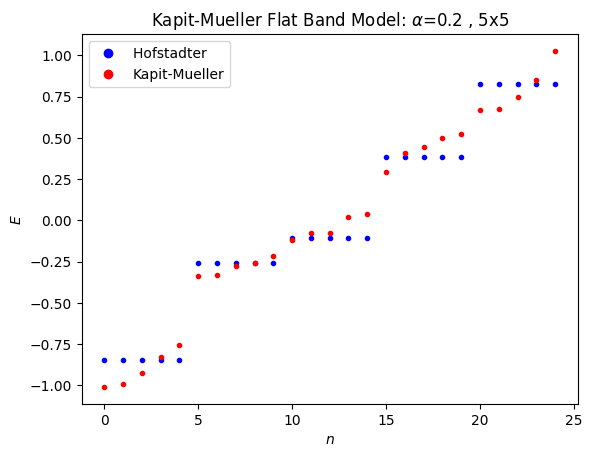

In [79]:
#Plot Kapit-Mueller Model
import matplotlib.pyplot  as plt
fig, ax = plt.subplots()
x_axis = np.arange(0, L_x*L_y, 1)
y_axis_Kapit = sorted_K
y_axis_Real = sorted_R
plt.xlabel(r'$n$')
plt.ylabel(r'$E$')
plt.title(r'Kapit-Mueller Flat Band Model: $\alpha$='+str(np.round(alpha,1))+' , '+str(L_x)+'x'+str(L_y)+'')
plt.plot(x_axis, y_axis_Real, 'bo', markersize=3, label='Hofstadter ')
plt.plot(x_axis, y_axis_Kapit, 'ro',markersize=3, label='Kapit-Mueller')
plt.legend(markerscale=2, fontsize=10, loc='upper left')
plt.show()

# KAPIT-MUELLER CHERN

In [80]:
# Discreatizing Brillioun Zone / Theta Space
Nt1=10
Nt2=10
dx = 2*np.pi/Nt1
dy = dx
Tx = np.arange(0, 2*np.pi, dx)
Ty = np.arange(0, 2*np.pi, dy);

In [81]:
from Chern_parameter_space_sum import *

In [82]:
EEA, UUA = calc_states_twist_kapit_mueller(L_x, L_y, Nt1, Nt2, p, q, Tx, Ty, Kapit_Mueller_Hamiltonian)
for i in np.arange(0, L_x*L_y, q):
    j=i+q
    n1=i
    n2=j
    UU = calc_link_vars_twist(UUA[:,:,:,i:j])
    F12 = calc_F12_BZ(UU)
    print(f'{F12.sum()/(2j*np.pi):.2e}')

1.00e+00+1.71e-16j
1.00e+00+3.58e-16j
-5.00e+00+8.66e-16j
2.00e+00-2.89e-16j
1.00e+00-5.14e-16j


In [88]:
EEA[8,7,:]

array([-1.00474107, -0.98890125, -0.92989082, -0.83038736, -0.7159007 ,
       -0.45716525, -0.34511238, -0.32867724, -0.29219375, -0.21409235,
       -0.03493131, -0.01812079,  0.0285691 ,  0.08346526,  0.11536718,
        0.25334289,  0.35727749,  0.39083423,  0.39738902,  0.44509982,
        0.67874318,  0.70750739,  0.80417349,  0.89081769,  1.00752754])